<a href="https://colab.research.google.com/github/ilombard20238/AiRetail1/blob/main/AiRetail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# cloning github

In [ ]:
!git clone https://github.com/ilombard20238/AiRetail1.git


fatal: destination path 'AiRetail1' already exists and is not an empty directory.


In [ ]:
import os
print(os.listdir("/content/AiRetail1"))  # should show your AiRetail folder
print(os.listdir("/content/AiRetail1/AiRetail"))  # should show 'train' and 'test'


['AiRetail', 'README.md', '.git']
['training', 'testing']


In [ ]:
data_dir = "/content/AiRetail1/AiRetail"
train_dir = f"{data_dir}/training"
test_dir  = f"{data_dir}/testing"

print("Train exists?", os.path.exists(train_dir))
print("Test exists?", os.path.exists(test_dir))


Train exists? True
Test exists? True


In [ ]:
data_dir = "/content/AiRetail1/AiRetail"
train_dir = f"{data_dir}/training"
test_dir  = f"{data_dir}/testing"

print("Train exists?", os.path.exists(train_dir))
print("Test exists?", os.path.exists(test_dir))


Train exists? True
Test exists? True


# organizing the files

In [ ]:
import os
import shutil

# Set paths
data_dir = "/content/AiRetail1/AiRetail"
for folder in ["training", "testing"]:
    folder_path = os.path.join(data_dir, folder)
    if not os.path.exists(folder_path):
        print(f"{folder_path} does not exist!")
        continue

    # List all images in current folder
    images = [f for f in os.listdir(folder_path) if f.endswith(('.jpg','.png'))]

    for img in images:
        # Get class name from filename (everything before .jpg)
        class_name = os.path.splitext(img)[0]

        # Make class folder if it doesn't exist
        class_folder = os.path.join(folder_path, class_name)
        os.makedirs(class_folder, exist_ok=True)

        # Move image into class folder
        src_path = os.path.join(folder_path, img)
        dst_path = os.path.join(class_folder, img)
        shutil.move(src_path, dst_path)

print("Dataset reorganized successfully!")


Dataset reorganized successfully!


#alexnet with W&B





wandb: WARNING No relevant files were detected in the specified directory. No code will be logged to your run.
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cpu
Classes: ['bag1', 'bag2', 'hat1', 'hat2', 'shoe1', 'shoe2']
Epoch [1/25] - Loss: 2.6519 - Val Accuracy: 100.00%
Epoch [2/25] - Loss: 1.3998 - Val Accuracy: 100.00%
Epoch [3/25] - Loss: 0.4455 - Val Accuracy: 100.00%
Epoch [4/25] - Loss: 0.2397 - Val Accuracy: 100.00%
Epoch [5/25] - Loss: 0.1020 - Val Accuracy: 83.33%
Epoch [6/25] - Loss: 1.3289 - Val Accuracy: 83.33%
Epoch [7/25] - Loss: 0.0000 - Val Accuracy: 100.00%
Epoch [8/25] - Loss: 1.1431 - Val Accuracy: 100.00%
Epoch [9/25] - Loss: 0.0011 - Val Accuracy: 100.00%
Epoch [10/25] - Loss: 0.0069 - Val Accuracy: 100.00%
Epoch [11/25] - Loss: 0.0011 - Val Accuracy: 100.00%
Epoch [12/25] - Loss: 0.0007 - Val Accuracy: 100.00%
Epoch [13/25] - Loss: 0.0056 - Val Accuracy: 100.00%
Epoch [14/25] - Loss: 0.0004 - Val Accuracy: 100.00%
Epoch [15/25] - Loss: 0.0000 - Val Accuracy: 100.00%
Epoch [16/25] - Loss: 0.0000 - Val Accuracy: 100.00%
Epoch [17/25] - Loss: 0.0000 - Val Accuracy: 100.00%
Epoch [18/25] - Loss: 0.0000 - V

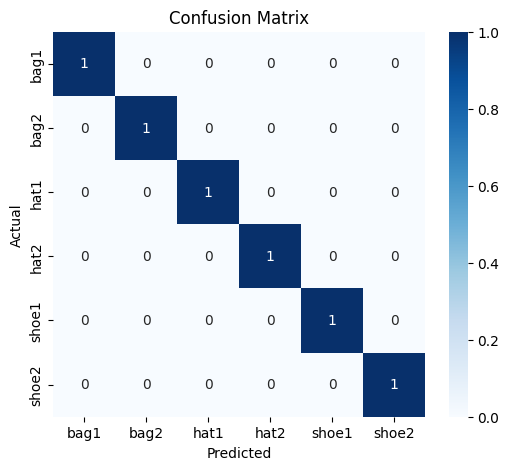

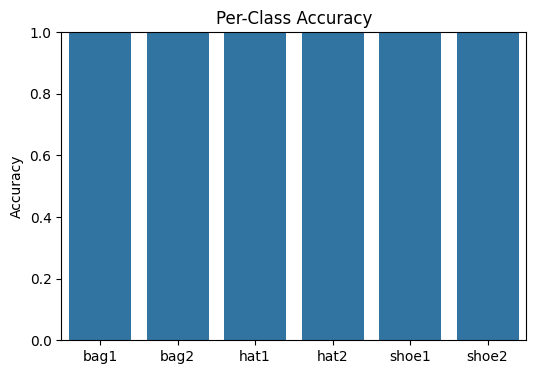

train_loss,█▅▂▂▁▅▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,████▁▁███████████████████
train_loss,0.0
val_accuracy,1


In [ ]:
# ----------------------------------------------------
# 0️⃣ Install W&B
# ----------------------------------------------------
!pip install wandb -q

# ----------------------------------------------------
# 1️⃣ Imports
# ----------------------------------------------------
import wandb
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from IPython.display import display, IFrame
import os

# ----------------------------------------------------
# 2️⃣ Finish any previous W&B runs
# ----------------------------------------------------
wandb.finish()

# ----------------------------------------------------
# 3️⃣ W&B Login + Init
# ----------------------------------------------------
wandb.login()

wandb.init(
    project="AiRetail-AlexNet",
    name="alexnet-enhanced",
    config={
        "epochs": 10,
        "batch_size": 2,
        "learning_rate": 3e-4,
        "optimizer": "Adam",
        "architecture": "AlexNet",
    },
    reinit=True
)

wandb.run.log_code(".")

# ----------------------------------------------------
# 4️⃣ Device
# ----------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ----------------------------------------------------
# 5️⃣ Paths + DataLoaders
# ----------------------------------------------------
data_dir = "/content/AiRetail1/AiRetail"
train_dir = os.path.join(data_dir, "training")
val_dir   = os.path.join(data_dir, "testing")

assert os.path.exists(train_dir), f"{train_dir} does not exist!"
assert os.path.exists(val_dir), f"{val_dir} does not exist!"

# Data augmentation for training
train_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# Validation/test transforms (no augmentation)
val_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

train_ds = datasets.ImageFolder(train_dir, transform=train_tf)
val_ds   = datasets.ImageFolder(val_dir, transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=wandb.config.batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=wandb.config.batch_size)

class_names = train_ds.classes
print("Classes:", class_names)

# ----------------------------------------------------
# 6️⃣ AlexNet Model
# ----------------------------------------------------
model = models.alexnet(pretrained=True)
num_classes = len(class_names)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
model = model.to(device)

# ----------------------------------------------------
# 7️⃣ Loss + Optimizer
# ----------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=wandb.config.learning_rate)

# ----------------------------------------------------
# 8️⃣ Training Loop with W&B Logging
# ----------------------------------------------------

# Number of times the model will go through the entire training dataset
num_epochs = 25

for epoch in range(num_epochs):
    model.train()  # set model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()           # reset gradients
        outputs = model(images)         # forward pass
        loss = criterion(outputs, labels)  # compute loss
        loss.backward()                 # backpropagation
        optimizer.step()                # update weights

        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_ds)

    # Validation step
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = val_correct / val_total

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f} - Val Accuracy: {val_accuracy*100:.2f}%")

    # Log metrics to W&B
    wandb.log({"train_loss": epoch_loss, "val_accuracy": val_accuracy})


# ----------------------------------------------------
# 9️⃣ Confusion Matrix Logging to W&B
# ----------------------------------------------------
wandb.log({
    "confusion_matrix": wandb.plot.confusion_matrix(
        y_true=all_labels,
        preds=all_preds,
        class_names=class_names
    )
})

# ----------------------------------------------------
# 🔟 Save Model
# ----------------------------------------------------
torch.save(model.state_dict(), "alexnet_retailAI.pth")
wandb.save("alexnet_retailAI.pth")
print("Model saved!")

# ----------------------------------------------------
# 1️⃣1️⃣ Local Confusion Matrix & Per-Class Accuracy
# ----------------------------------------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

per_class_acc = cm.diagonal() / cm.sum(axis=1)
plt.figure(figsize=(6,4))
sns.barplot(x=class_names, y=per_class_acc)
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Per-Class Accuracy')
plt.show()

# ----------------------------------------------------
# 1️⃣2️⃣ Inline W&B Dashboard in Colab
# ----------------------------------------------------
display(IFrame(
    src=f"https://wandb.ai/{wandb.run.entity}/{wandb.run.project}/runs/{wandb.run.id}",
    width=900,
    height=600
))

# ----------------------------------------------------
# 1️⃣3️⃣ Finish W&B Run
# ----------------------------------------------------
wandb.finish()


#upload a pic

In [ ]:
from google.colab import files
from PIL import Image
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F

# -----------------------------
# 1️⃣ Define your prices
# -----------------------------
prices = {
    "bag1": 26.49,
    "bag2": 19.82,
    "hat1": 27.99,
    "hat2": 12.99,
    "shoe1": 16.99,
    "shoe2": 40.99
}

# -----------------------------
# 2️⃣ Load trained model
# -----------------------------
model_path = "alexnet_retailAI.pth"
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()

# -----------------------------
# 3️⃣ Upload image
# -----------------------------
uploaded = files.upload()  # Upload one image
img_path = list(uploaded.keys())[0]

# -----------------------------
# 4️⃣ Preprocess image
# -----------------------------
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# -----------------------------
# 5️⃣ Run prediction
# -----------------------------
with torch.no_grad():
    outputs = model(img_tensor)
    probs = F.softmax(outputs, dim=1)
    top3_prob, top3_idx = torch.topk(probs, k=3)

top3_prob = top3_prob.cpu().numpy()[0]
top3_idx  = top3_idx.cpu().numpy()[0]

# -----------------------------
# 6️⃣ Display results
# -----------------------------
print("\nTop 3 predictions:")
for i in range(3):
    label = class_names[top3_idx[i]]
    prob  = top3_prob[i] * 100
    price = prices.get(label, "N/A")
    print(f"{i+1}. {label} - {prob:.2f}% confidence - Price: ${price}")

# Optional: Display the uploaded image
img.show()


Saving chancla.jpeg to chancla (1).jpeg

Top 3 predictions:
1. shoe2 - 88.82% confidence - Price: $40.99
2. hat1 - 11.17% confidence - Price: $27.99
3. bag2 - 0.01% confidence - Price: $19.82
